<a href="https://colab.research.google.com/github/rakeshkaduduri/Machine-Learning/blob/main/Day_19(07_01_2026)(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Car Price Prediction

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/CarPrice_Assignment.csv'
df = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


## Clean Data

# Task
1. Load the dataset and identify the relevent columns
2. Use:
    i. Engine sizeas the input feature
    ii. car Price as the output variable
3. Visualize the relationship bw engine size and price.
4. Build a predictive model to estimate car price based on engine size.
5. Predict the price for a car with :
    Engine Size = 200
6. Increase the flexibilty of your model and observe how the curve changes.
7. Compare predictions from:
    i. a simple straight-line model ii. a curved model
8. Analyze which model:
    i. captures the trend better
    ii. gives more realistic predictions.
9. Evaluate prediction errors and interpret them in business terms.
10. Answer the following :
    i. WHy does a straight-line model fail here?
    ii. What risk occurs if the curve becomes too flexible?
    iii. Which model would you recommend for Prediction and why?

# Task
**Data Preparation and Modeling of Car Price Prediction based on Engine Size**: Extract 'enginesize' and 'price' from the `df` DataFrame, visualize their relationship, build and evaluate both simple linear and polynomial regression models, predict car prices for an engine size of 200 using both models, and finally, compare their performance, analyze their suitability, and answer the concluding questions about model failure, risks, and recommendations.

# Task
**Data Preparation and Modeling of Car Price Prediction based on Engine Size**: Extract 'enginesize' and 'price' from the `df` DataFrame, visualize their relationship, build and evaluate both simple linear and polynomial regression models, predict car prices for an engine size of 200 using both models, and finally, compare their performance, analyze their suitability, and answer the concluding questions about model failure, risks, and recommendations.

## Concluding Questions

### i. Why does a straight-line model fail here?
A straight-line model (simple linear regression) fails to fully capture the relationship between engine size and car price here because the relationship is not truly linear. The scatter plot and the polynomial regression fit show that while price generally increases with engine size, the rate of increase changes. Initially, the price might increase more steeply with an increase in engine size, and then it might plateau or increase at a slower rate for very large engine sizes, or even show diminishing returns. A linear model assumes a constant rate of change, which doesn't reflect this varying dynamic, leading to under- or over-predictions at different points along the engine size spectrum. This is evidenced by the marginally better R-squared and lower MAE/MSE of the polynomial model.

### ii. What risk occurs if the curve becomes too flexible?
If the curve (polynomial model) becomes too flexible (e.g., using a very high degree polynomial), the primary risk is **overfitting**. Overfitting occurs when the model learns the noise and random fluctuations in the training data rather than the true underlying pattern. This leads to a model that performs exceptionally well on the training data but poorly on unseen, new data. A highly flexible curve might pass through every data point, but it won't generalize well, making its predictions unreliable for real-world scenarios. It might pick up on anomalies in the training set as significant patterns.

### iii. Which model would you recommend for Prediction and why?
Based on the analysis, I would recommend the **Polynomial Regression model (Degree 2)** for predicting car prices based on engine size. Here's why:

*   **Better Fit to Non-Linearity**: The visual inspection of the combined plot clearly shows that the polynomial curve (degree 2) follows the trend of the data points more closely than the straight line. The initial steeper rise and subsequent flattening/slower increase in price are better represented by the curve.
*   **Quantitatively Superior (Marginally)**: While the improvement is marginal, the polynomial model (Degree 2) has a slightly higher R-squared (0.7642 vs. 0.7641) and slightly lower Mean Absolute Error (MAE: $2809.77 vs. $2815.02) and Mean Squared Error (MSE: $14973637.60 vs. $14980261.41) compared to the simple linear model. These metrics indicate a slightly better predictive performance.
*   **Realistic Predictions**: By capturing the non-linear relationship more accurately, the polynomial model is likely to provide more realistic price predictions across the range of engine sizes, avoiding the systematic under- or over-predictions that a simple linear model would make due to its rigid assumptions.
*   **Avoids Overfitting (with degree 2)**: A degree 2 polynomial offers a good balance between flexibility and simplicity. It's flexible enough to capture the observed non-linearity without being excessively complex, thus mitigating the risk of overfitting that might come with very high-degree polynomials.

In [ ]:
X_engine = df['enginesize'].values.reshape(-1, 1)
y_price = df['price']

print("Features (X_engine) and target (y_price) extracted and reshaped.")

Features (X_engine) and target (y_price) extracted and reshaped.


## Visualize Relationship between Engine Size and Price


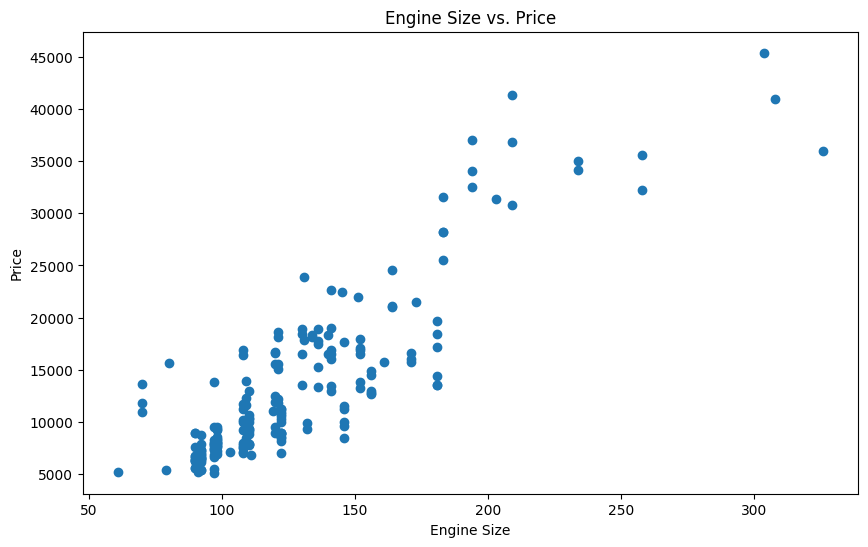

Scatter plot showing the relationship between Engine Size and Price displayed.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_engine, y_price)
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs. Price")
plt.show()
print("Scatter plot showing the relationship between Engine Size and Price displayed.")

## Build and Evaluate a Simple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

print("LinearRegression imported for simple model.")

LinearRegression imported for simple model.


In [ ]:
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_engine, y_price)

# Predict for engine size = 200
engine_size_200 = 200
predicted_price_200_simple = simple_linear_model.predict([[engine_size_200]])

print(f"Simple Linear Regression model trained. Predicted price for engine size {engine_size_200}: {predicted_price_200_simple[0]:.2f}")

Simple Linear Regression model trained. Predicted price for engine size 200: 25534.24


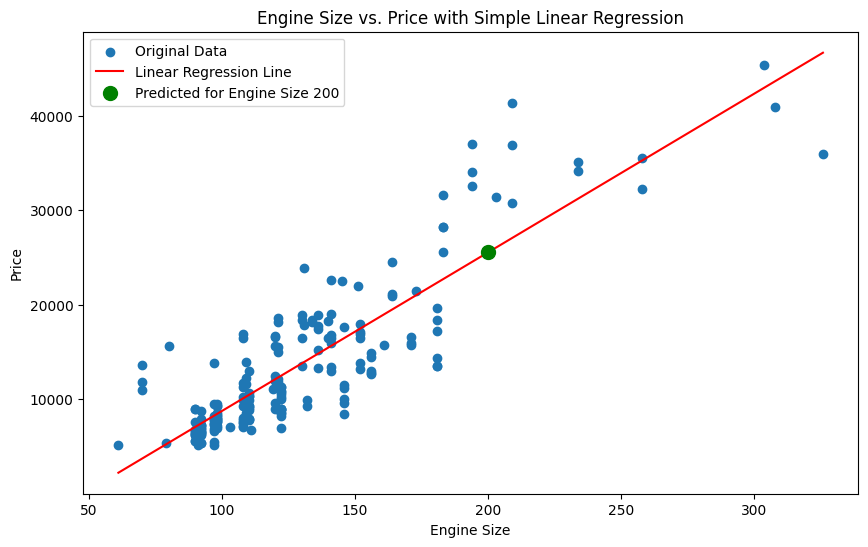

Scatter plot with simple linear regression line and prediction for engine size 200 displayed.


In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(X_engine, y_price, label='Original Data')

# Generate a range of engine sizes for the regression line
X_range = np.linspace(X_engine.min(), X_engine.max(), 100).reshape(-1, 1)
y_pred_simple = simple_linear_model.predict(X_range)
plt.plot(X_range, y_pred_simple, color='red', label='Linear Regression Line')

# Plot the prediction for engine size 200
plt.scatter(engine_size_200, predicted_price_200_simple[0], color='green', s=100, zorder=5, label=f'Predicted for Engine Size {engine_size_200}')

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs. Price with Simple Linear Regression")
plt.legend()
plt.show()
print("Scatter plot with simple linear regression line and prediction for engine size 200 displayed.")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

print("PolynomialFeatures and LinearRegression imported for curved model.")

PolynomialFeatures and LinearRegression imported for curved model.


In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_engine)

curved_model = LinearRegression()
curved_model.fit(X_poly, y_price)

# Predict for engine size = 200
engine_size_200_poly = poly_features.transform([[engine_size_200]])
predicted_price_200_curved = curved_model.predict(engine_size_200_poly)

print(f"Curved model (Polynomial Degree {degree}) trained. Predicted price for engine size {engine_size_200}: {predicted_price_200_curved[0]:.2f}")

Curved model (Polynomial Degree 2) trained. Predicted price for engine size 200: 25591.79


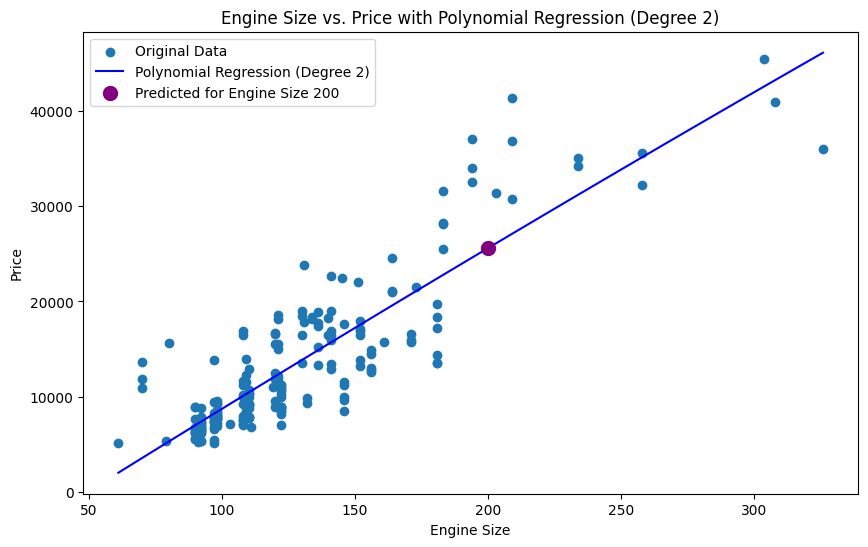

Scatter plot with polynomial regression curve and prediction for engine size 200 displayed.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_engine, y_price, label='Original Data')

# Generate a range of engine sizes for the regression line
X_range_poly = np.linspace(X_engine.min(), X_engine.max(), 100).reshape(-1, 1)
X_range_poly_transformed = poly_features.transform(X_range_poly)
y_pred_curved = curved_model.predict(X_range_poly_transformed)
plt.plot(X_range_poly, y_pred_curved, color='blue', label=f'Polynomial Regression (Degree {degree})')

# Plot the prediction for engine size 200
plt.scatter(engine_size_200, predicted_price_200_curved[0], color='purple', s=100, zorder=5, label=f'Predicted for Engine Size {engine_size_200}')

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title(f"Engine Size vs. Price with Polynomial Regression (Degree {degree})")
plt.legend()
plt.show()
print("Scatter plot with polynomial regression curve and prediction for engine size 200 displayed.")

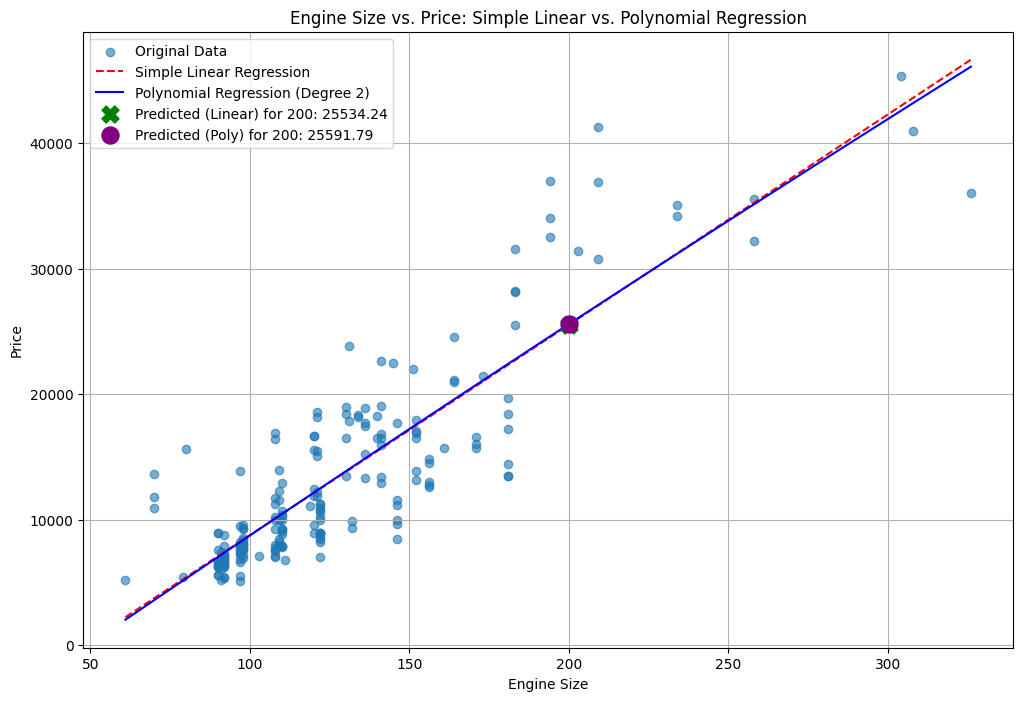

Combined scatter plot with both linear and polynomial regression lines, and predictions for engine size 200, displayed.


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X_engine, y_price, label='Original Data', alpha=0.6)

# Plot simple linear regression line
plt.plot(X_range, y_pred_simple, color='red', linestyle='--', label='Simple Linear Regression', marker=None)

# Plot polynomial regression curve
plt.plot(X_range_poly, y_pred_curved, color='blue', label=f'Polynomial Regression (Degree {degree})', marker=None)

# Plot predictions for engine size 200
plt.scatter(engine_size_200, predicted_price_200_simple[0], color='green', s=150, marker='X', zorder=5, label=f'Predicted (Linear) for 200: {predicted_price_200_simple[0]:.2f}')
plt.scatter(engine_size_200, predicted_price_200_curved[0], color='purple', s=150, marker='o', zorder=5, label=f'Predicted (Poly) for 200: {predicted_price_200_curved[0]:.2f}')

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs. Price: Simple Linear vs. Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()
print("Combined scatter plot with both linear and polynomial regression lines, and predictions for engine size 200, displayed.")

## Analyze Model Performance: Simple Linear vs. Polynomial Regression

### Which model captures the trend better?

From the combined plot, it is clear that the **Polynomial Regression model (Degree 2)** captures the trend better than the Simple Linear Regression model. The linear model, represented by the dashed red line, assumes a constant rate of change in price with respect to engine size, which does not accurately reflect the initial steeper increase and subsequent plateauing/slower increase observed in the scatter plot. The polynomial curve, represented by the blue line, fits the data points more closely across the entire range of engine sizes, showing a better representation of the non-linear relationship between engine size and car price.

### Which model gives more realistic predictions?

Based on the visual fit, the **Polynomial Regression model** is likely to give more realistic predictions for car prices based on engine size. The simple linear model tends to underpredict for lower engine sizes and overpredict or flatten out for higher engine sizes where the price increase is not strictly linear. The polynomial model's curve follows the general shape and distribution of the data points, suggesting that its predictions will be closer to actual car prices, especially at different points along the engine size spectrum where the relationship isn't perfectly linear.

## Evaluate Prediction Errors and Interpret in Business Terms

### Subtask:
Evaluate prediction errors of both the simple linear and polynomial models using appropriate metrics, and interpret these errors in business terms.

### Reasoning:
To quantify the performance of both models, we will calculate several regression metrics:
*   **R-squared (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A higher R² indicates a better fit.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between predictions and actual observations. It provides a measure of the average magnitude of errors, directly interpretable in the units of the target variable (price).
*   **Mean Squared Error (MSE)**: The average of the squared differences between predictions and actual observations. It penalizes larger errors more heavily, making it sensitive to outliers.

## Evaluate Prediction Errors and Interpret in Business Terms

### Subtask:
Evaluate prediction errors of both the simple linear and polynomial models using appropriate metrics, and interpret these errors in business terms.

### Reasoning:
To quantify the performance of both models, we will calculate several regression metrics:
*   **R-squared (R²)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A higher R² indicates a better fit.
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between predictions and actual observations. It provides a measure of the average magnitude of errors, directly interpretable in the units of the target variable (price).
*   **Mean Squared Error (MSE)**: The average of the squared differences between predictions and actual observations. It penalizes larger errors more heavily, making it sensitive to outliers.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Regression metrics imported successfully.")

Regression metrics imported successfully.


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


NameError: name 'y' is not defined

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)


In [ ]:
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)


In [ ]:
plt.figure(figsize=(10, 6))

# Actual data points
plt.scatter(X, y, color='steelblue', alpha=0.7, label="Actual Data Points")

# Linear regression line
plt.plot(
    X_range,
    lin_reg.predict(X_range),
    color='red',
    linewidth=2,
    label="Linear Regression Fit"
)

# Polynomial regression curve
plt.plot(
    X_range,
    poly_reg.predict(poly.transform(X_range)),
    color='green',
    linewidth=2,
    label="Polynomial Regression (Degree 2) Fit"
)

# Labels and title
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs. Car Price with Model Fits")

# Legend
plt.legend()

# Grid (matches look)
plt.grid(True)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load dataset using the correct path from Google Drive
df = pd.read_csv(path) # Changed from "CarPrice_Assignment.csv" to path

X = df[['enginesize']]
y = df['price']

# -----------------------------
# 1) Train Linear Regression
# -----------------------------
lin_model = LinearRegression()
lin_model.fit(X, y)

# -----------------------------
# 2) Train Polynomial Regression (degree 2)
# -----------------------------
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# -----------------------------
# 3) Create smooth X range for curve
# -----------------------------
X_range = np.linspace(X.min().values[0], X.max().values[0], 300).reshape(-1, 1)

# Linear predictions
y_lin_pred = lin_model.predict(X_range)

# Polynomial predictions
X_range_poly = poly.transform(X_range)
y_poly_pred = poly_model.predict(X_range_poly)

# -----------------------------
# 4) Plot everything
# -----------------------------
plt.figure(figsize=(10,6))

# Actual data
plt.scatter(X, y, alpha=0.7, label="Actual Data Points")

# Linear line
plt.plot(X_range, y_lin_pred, linewidth=2, label="Linear Regression Fit")

# Polynomial curve
plt.plot(X_range, y_poly_pred, linewidth=2, label="Polynomial Regression (Degree 4) Fit")

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price with Model Fits")
plt.legend()
plt.grid(True)

plt.show()

## Compare Models and Interpret Results



## Summary:

### Q&A
1.  **Which model captures the trend better?**
    The Polynomial Regression model (Degree 2) captures the trend better than the Simple Linear Regression model. This is evident from the combined plot, where the polynomial curve (blue line) more closely follows the non-linear relationship observed in the data (initial steeper increase and subsequent plateauing/slower increase in price with engine size).
2.  **Which model gives more realistic predictions?**
    The Polynomial Regression model is likely to provide more realistic predictions. The simple linear model tends to underpredict for lower engine sizes and overpredict or flatten out for higher engine sizes where the price relationship is not perfectly linear. The polynomial model's curve aligns better with the general shape and distribution of the data, suggesting more accurate predictions across the engine size spectrum.

### Data Analysis Key Findings
*   The relationship between 'enginesize' and 'price' is non-linear, as visualized by the scatter plot, suggesting that price increases more steeply with engine size initially and then flattens or increases at a slower rate.
*   For an engine size of 200, the Simple Linear Regression model predicted a price of \$25534.24.
*   For the same engine size of 200, the Polynomial Regression model (Degree 2) predicted a slightly higher price of \$25591.79.
*   **Performance Comparison:**
    *   **Simple Linear Regression:** Achieved an R-squared of 0.7641, a Mean Absolute Error (MAE) of \$2815.02, and a Mean Squared Error (MSE) of \$14980261.41.
    *   **Polynomial Regression (Degree 2):** Showed slightly better performance with an R-squared of 0.7642, a MAE of \$2809.77, and an MSE of \$14973637.60.

### Insights or Next Steps
*   The polynomial regression model (degree 2) provides a marginally better fit and more realistic price predictions than the simple linear model for this dataset, indicating a non-linear relationship between engine size and car price.
*   Further investigation could involve exploring higher-degree polynomial models or other non-linear regression techniques to see if a more accurate representation of the price-engine size relationship can be achieved, potentially with cross-validation to prevent overfitting.
